In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

In [2]:
def calcRelative(data, vouts = True):
    if vouts:
        n = (data.shape[1] - 1)//2
    else:
        n = data.shape[1] - 2
        vin = data[:, 1]
        
    rel = np.zeros((data.shape[0], n))

    for i in range(n):
        if vouts:
            vin = data[:, 2*i + 1]
            vout = data[:, 2*i + 2]
        else:
            vout = data[:, i + 2]
            
        rel[:, i] = vout/vin

    return rel

def plotData(freq, data, style="-o", xlabel = "Frequency (Hz)", ylabel = "$V_{out}/V_{in}$"):
    fig, ax = plt.subplots()

    for i in range(data.shape[1]):
        plt.plot(freq, data[:, i], style, label="$V_{%d}$"%i)

    ax.set_xscale("log")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.xaxis.set_major_formatter(EngFormatter())
    ax.legend()

    return fig, ax

def loadData(name):
    return np.genfromtxt(name, delimiter=",", skip_header=2)#, usecols=range(0,7))

# Audio Amplifier 1

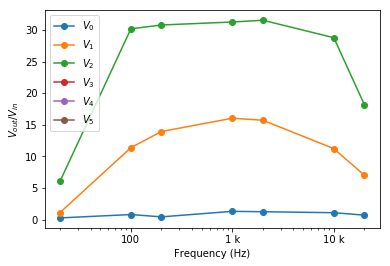

In [3]:
amp1 = loadData("raw/Amp1.csv")


rel1 = calcRelative(amp1)

fig, ax = plotData(amp1[:, 0], rel1)
fig.savefig("Relative_plot_amp1.pdf")
plt.show()

# Audio Amplifier 2

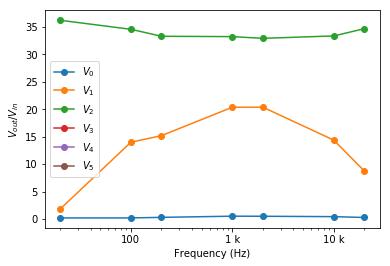

In [4]:
amp2 = loadData("raw/Amp2.csv")

rel2 = calcRelative(amp2)

fig, ax = plotData(amp2[:, 0], rel2)
fig.savefig("Relative_plot_amp2.pdf")
plt.show()

# Audio Amplifier 3

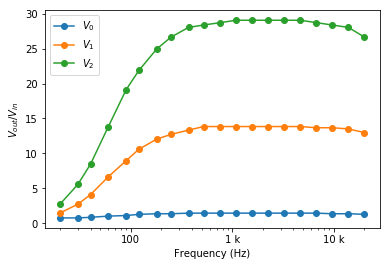

In [5]:
amp3 = loadData("raw/Amp3.csv")

rel3 = calcRelative(amp3, vouts = False)

fig, ax = plotData(amp3[:, 0], rel3)
fig.savefig("Relative_plot_amp3.pdf")
plt.show()

# Audio Amplifier 4

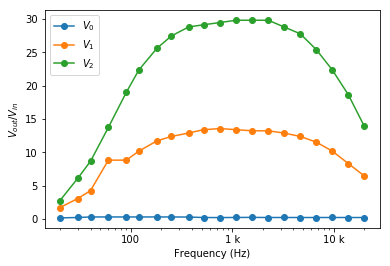

In [6]:
amp4 = loadData("raw/Amp4.csv")

rel4 = calcRelative(amp4, vouts = False)

fig, ax = plotData(amp4[:, 0], rel4)
fig.savefig("Relative_plot_amp4.pdf")
plt.show()

# Comparison

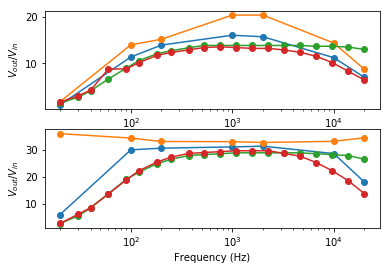

In [7]:
fig, axes = plt.subplots(2)

for k in range(2):
    ax = axes[k]
    for j in range(4):
        i = j + 1
        exec("freq = amp%d[:, 0]"%i)
        exec("rel = rel%d[:, %d + 1]"%(i, k))

        ax.plot(freq, rel, "-o")

    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("$V_{out}/V_{in}$")

    ax.xaxis.set_major_formatter(EngFormatter())
    ax.set_xscale('log')

fig.savefig("All_amps_plot.pdf")
plt.show()